$y'-2xy=1$ la solucion es $y(x)=e^{x^2}(\frac{\sqrt{\pi}}{2}erf(x)+y_0)$ donde $erf(x)=\frac{1}{\sqrt{\pi}}\int_0^x e^{-t^2}dt$ Encuentre y(0.4) de la ec diferencial $y(0)=1$

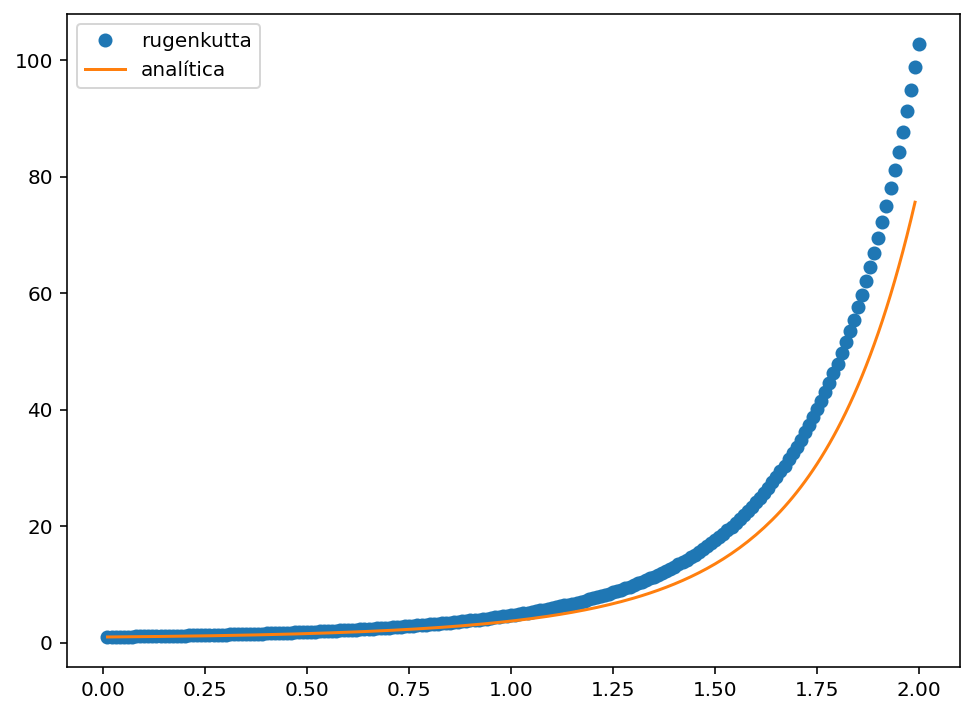

In [ ]:
from simpson import simpson
import numpy as np
from rugekutta import rugekutta
import matplotlib.pyplot as plt
def f(x,y):
    return 1+2*x*y
[u,v]=rugekutta(f,0,1,0.01,200)

r=[]
x1=[]
t=0
Ax=0.01
def g(x):
    return np.exp(-x**2)
for i in range(1,200):
    t=Ax*i
    r=r+[np.exp(t**2)*((1/2)*simpson(g,0,t,200)+1.0)]
    x1=x1+[t]
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(u,v,'o',label='rugenkutta')
ax.plot(x1,r,label='analítica')
plt.legend()

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = 2 y{\\left(x \\right)}$'}>

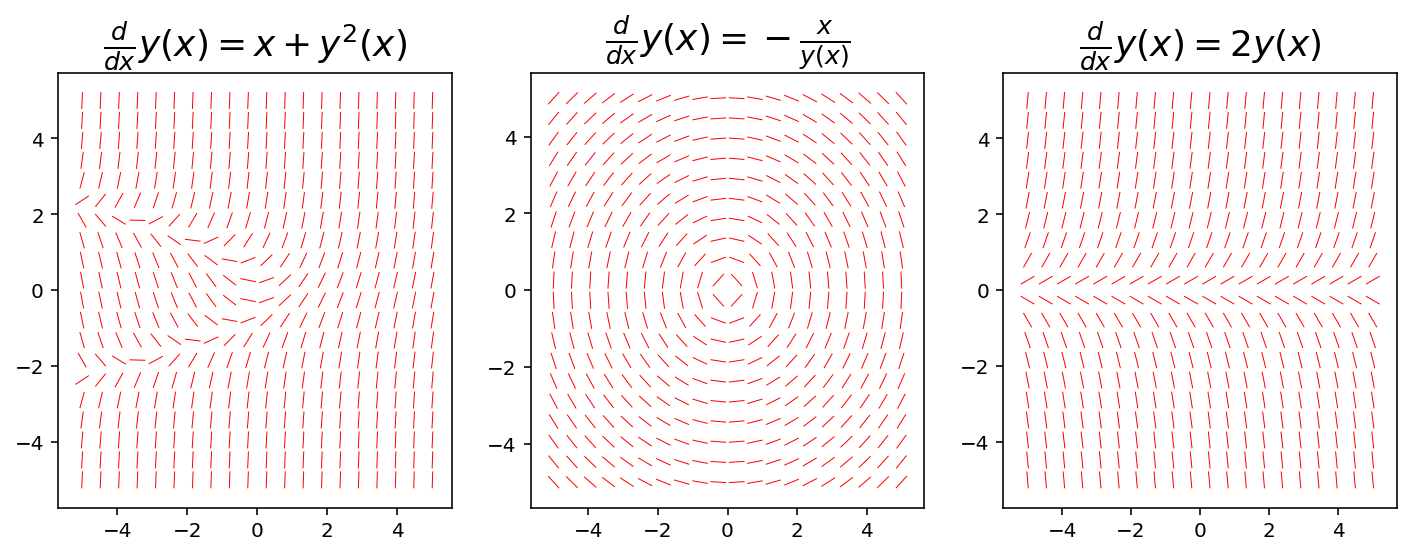

In [ ]:
import matplotlib.pyplot
import sympy
import numpy as np
def plot_direction_field(x,y_x,f_xy,x_lim=(-5,5),y_lim=(-5,5),ax=None):
    f_np=sympy.lambdify((x,y_x),f_xy,'numpy')
    x_vec=np.linspace(x_lim[0],x_lim[1],20)
    y_vec=np.linspace(y_lim[0],y_lim[1],20)
    if ax is None:
        _, ax=plt.subplots(figsize=(4,4))
    dx=x_vec[1]-x_vec[0]
    dy=y_vec[1]-y_vec[0]
    for m,xx in enumerate(x_vec):
        for n,yy in enumerate(y_vec):
            Dy=f_np(xx,yy)*dx
            Dx=0.8*dx**2/np.sqrt(dx**2+Dy**2)
            Dy=0.8*Dy*dy/np.sqrt(dx**2+Dy**2)
            ax.plot([xx-Dx/2,xx+Dx/2],[yy-Dy/2,yy+Dy/2],'r',lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$"%
                 (sympy.latex(sympy.Eq(y(x).diff(x),f_xy))),
                    fontsize=18)
    return ax
x=sympy.symbols("x")
y=sympy.Function("y")
fig,axes=plt.subplots(1,3,figsize=(12,4))
plot_direction_field(x,y(x),y(x)**2+x,ax=axes[0])
plot_direction_field(x,y(x),-x/y(x),ax=axes[1])
plot_direction_field(x,y(x),y(x)*2,ax=axes[2])

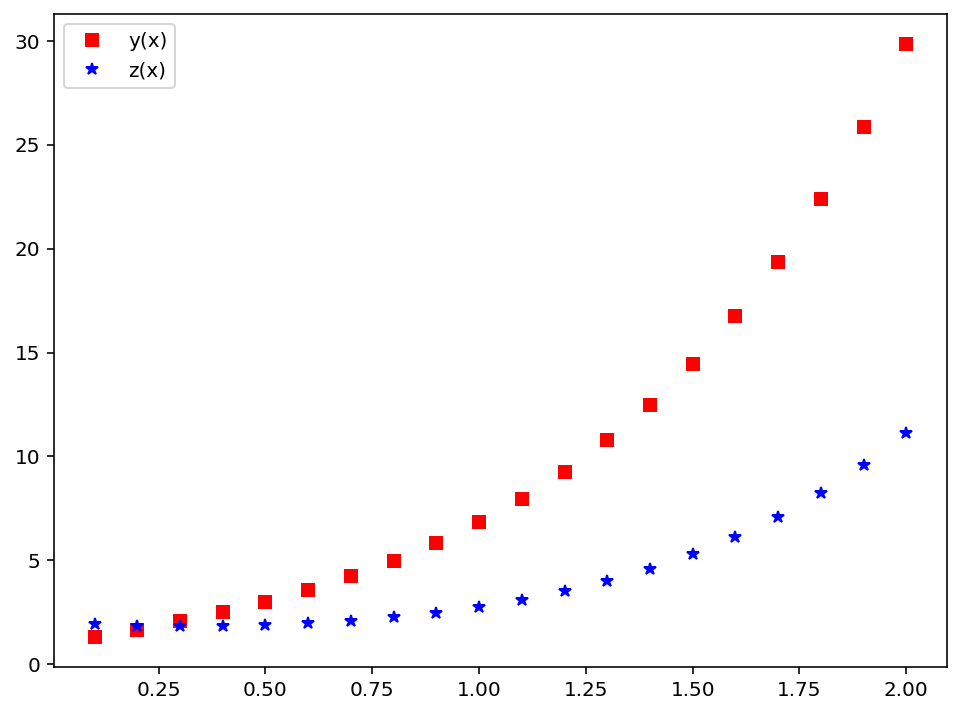

In [ ]:
from heun2 import heun2
import matplotlib.pyplot as plt
def f(x,y,z):
    return x+y+z
def g(x,y,z):
    return -x+y-z
[u,v,w]=heun2(f,g,0,1,2,0.1,20)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(u,v,'sr',label='y(x)')
ax.plot(u,w,'*b',label='z(x)')
plt.legend()

### Instrumentación computacional de la fórmula de Runge Kutta para dos EDO de primer orden

$y'-x-y-z=0,y(0)=1$  //   $z'+x-y+z=0,z(0)=2$

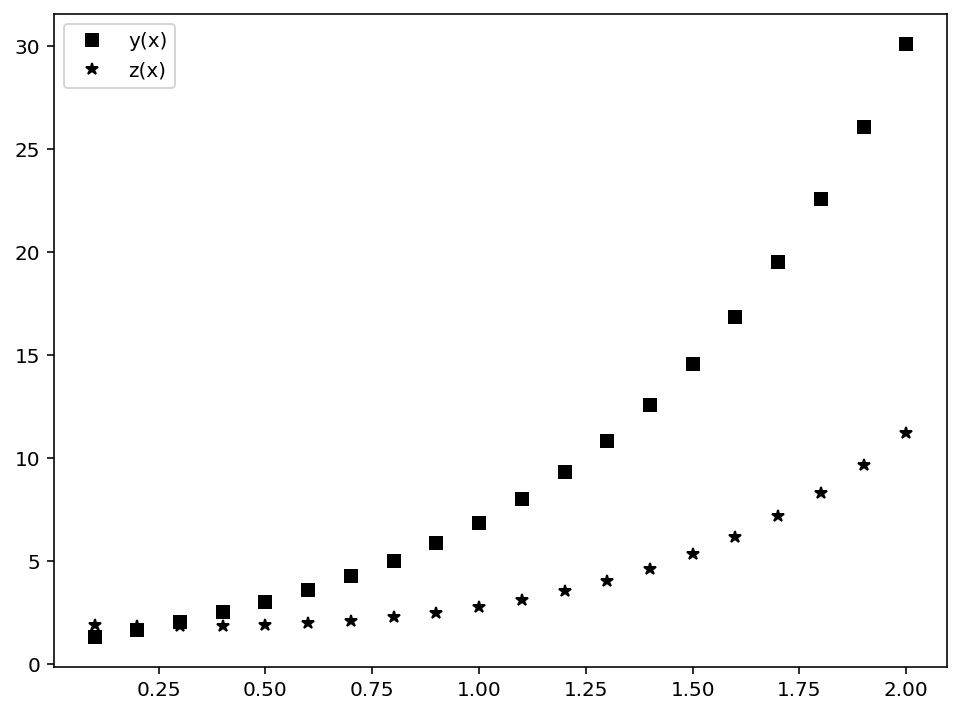

In [ ]:
from rungekuttaEDO2 import rungekuttaEDO2
import matplotlib.pyplot as plt
def f(x,y,z):
    return x+y+z
def g(x,y,z):
    return -x+y-z
[u,v,w]=rungekuttaEDO2(f,g,0,1,2,0.1,20)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(u,v,'sk',label='y(x)')
ax.plot(u,w,'*k',label='z(x)')
plt.legend()

simplificación del modelo SIR con nacimientos y muertes, en donde un individuo recobrado nunca desarrolla inmunidad de enfermedad, de modo que el flujo de un grupo a otro resulta, con ecuaciones diferenciales: $\frac{dS}{dt}=-\beta SI+\mu (N-s)+\gamma I$ //$\frac{dI}{dt}=\beta SI-\gamma I-\mu I$ 

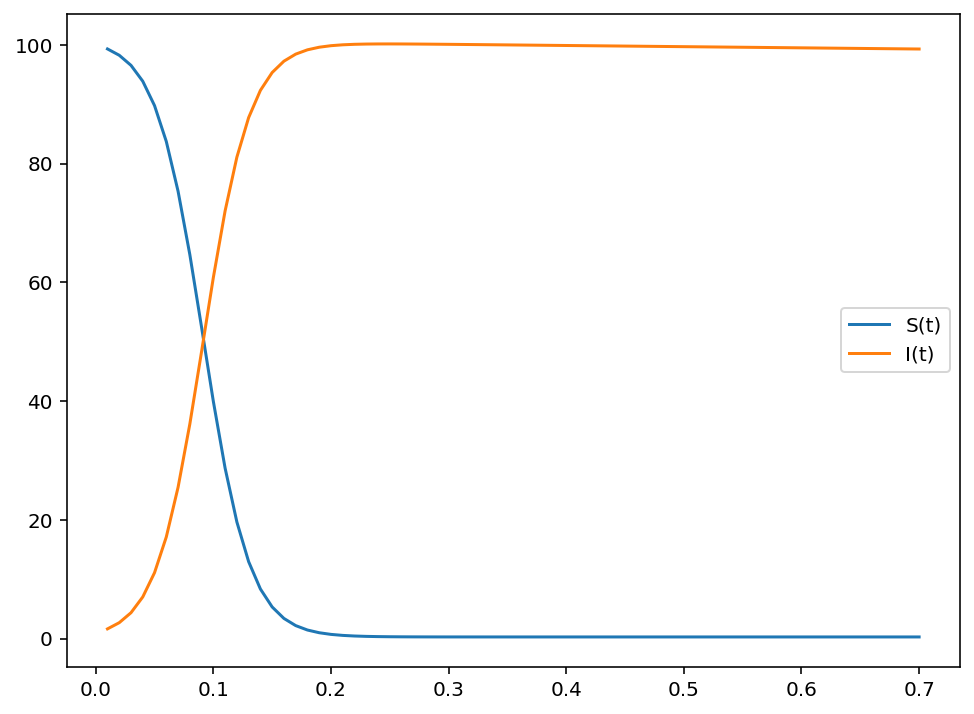

In [ ]:
from rungekuttaEDO2 import rungekuttaEDO2
import matplotlib.pyplot as plt
beta=0.5
mu=0.02
gamma=1/7.
N=1.
def f(x,y,z):
    return -1*beta*y*z+mu*(N-y)+gamma*z
def g(x,y,z):
    return beta*y*z-gamma*z-mu*z
[u,v,w]=rungekuttaEDO2(f,g,0.,100.,1.,0.01,70)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(u,v,label='S(t)')
ax.plot(u,w,label='I(t)')
plt.legend()

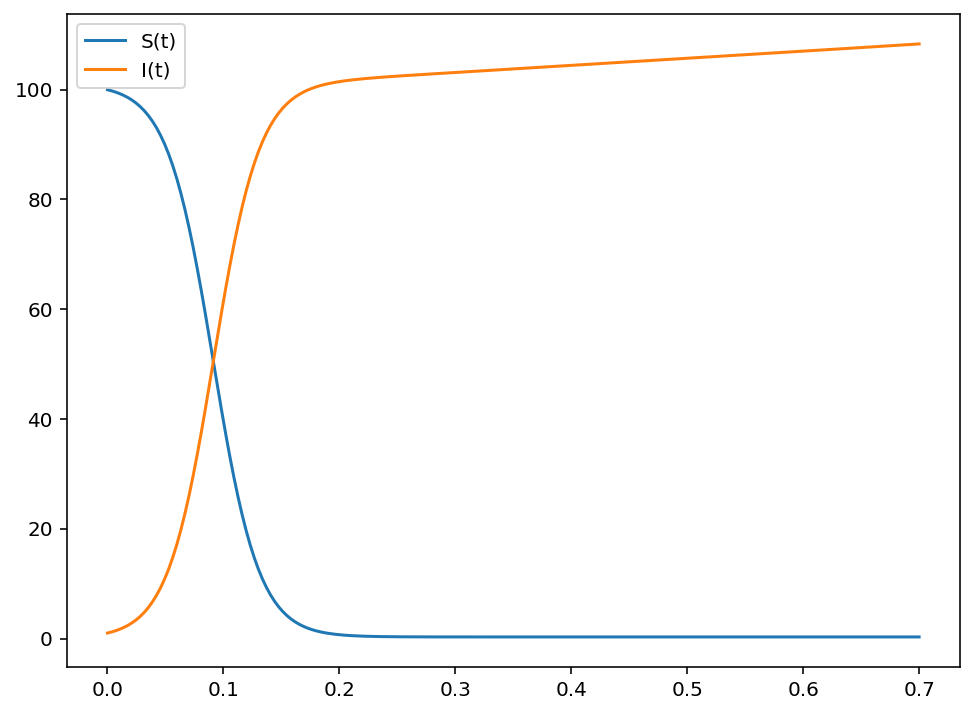

In [ ]:
#Comparamos con el odein
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
beta=0.5
mu=0.02
gmma=1/7
N=1
def f(yz,x):
    y,z=yz
    return [-1*beta*y*z+mu*(N-y)+gamma*z,beta*y*z-mu*z]
yz0=[100,1]
x=np.linspace(0,0.7,200)
yz_x=integrate.odeint(f,yz0,x)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(x,yz_x[:,0],label='S(t)')
ax.plot(x,yz_x[:,1],label='I(t)')
plt.legend()

Ecuacione de Loka-Volterra, también conocidad como ecuaciones predador-presa o pre-preadador:
$\frac{dx}{dt}=x(\alpha-\beta y)$
$\frac{dy}{dt}=-y(\gamma -\delta x)$
y- Número de un predador(lobo)
x-Número de presas (conejo)
dy/dy y dx/dt crecimiento de poblaciones en el tiempo
$\alpha,\beta,\delta$ son parámetros(positivos) que representan interacción etre especies

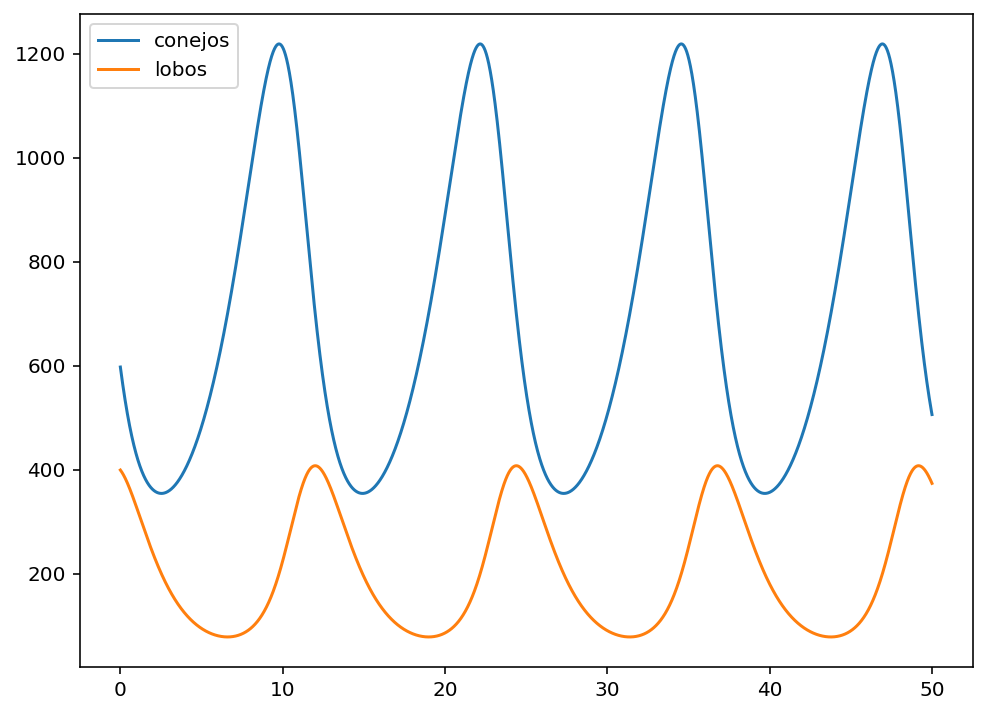

In [ ]:
#cambio de variable t->x, x->y, y->z
from rungekuttaEDO2 import rungekuttaEDO2
import matplotlib.pyplot as plt
a0=0.4
b0=0.002
g0=0.001
d0=0.7
def f(x,y,z):
    return a0*y-b0*y*z
def g(x,y,z):
    return g0*y*z-d0*z
[u,v,w]=rungekuttaEDO2(f,g,0.,600.,400.,0.01,5000)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(u,v,label='conejos')
ax.plot(u,w,label='lobos')
plt.legend()

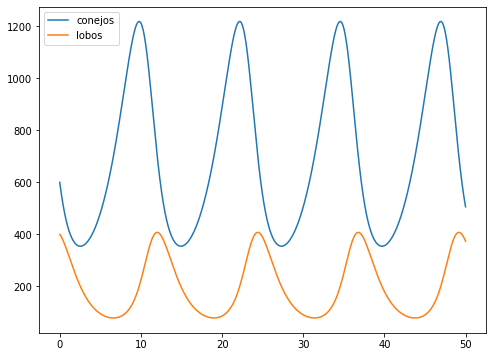

In [4]:
#Comparamos con el odein
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
a0=0.4
b0=0.002
g0=0.001
d0=0.7
def f(yz,x):
    y,z=yz
    return [a0*y-b0*y*z,g0*y*z-d0*z]
yz0=[600,400]
x=np.linspace(0,50,2000)
yz_x=integrate.odeint(f,yz0,x)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(x,yz_x[:,0],label='conejos')
ax.plot(x,yz_x[:,1],label='lobos')
plt.legend()

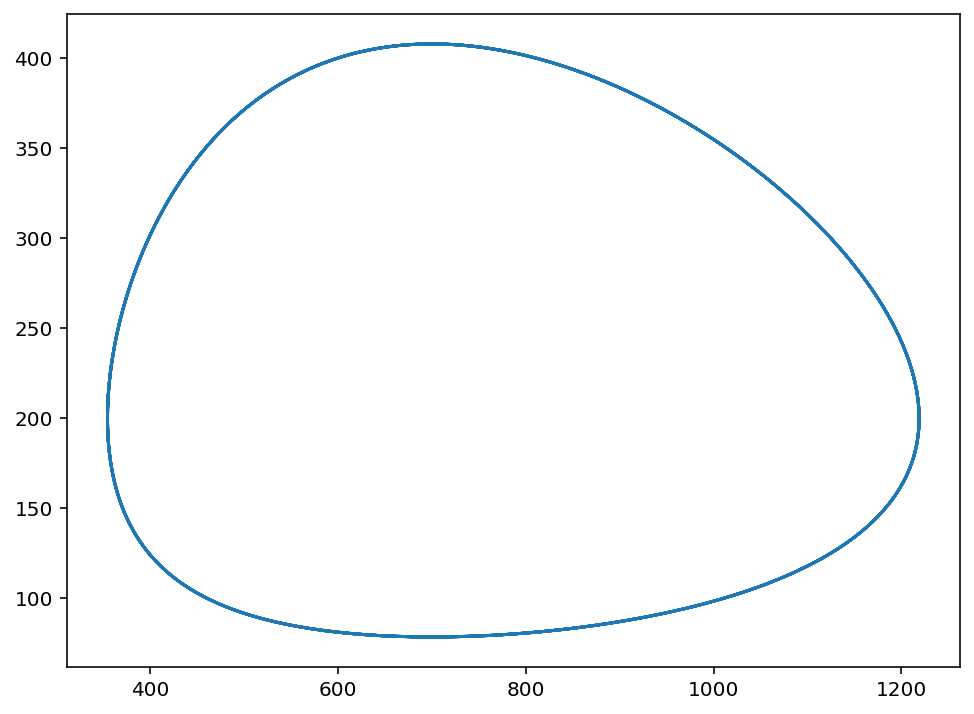

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(yz_x[:,0],yz_x[:,1])

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{0.001 x y{\\left(x \\right)} - 0.7 y{\\left(x \\right)}}{- 0.002 x y{\\left(x \\right)} + 0.4 x}$'}>

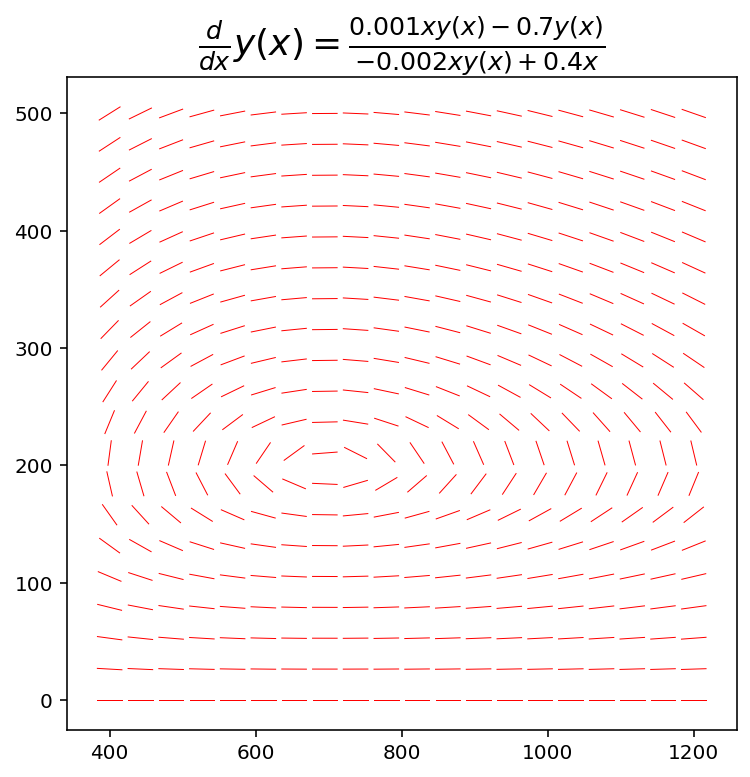

In [ ]:
#Campo de dirreciones de los conejos
import sympy
x=sympy.symbols('x')
y=sympy.Function('y')
fig,axes=plt.subplots(1,1,figsize=(6,6))
a0=0.4
b0=0.002
g0=0.001
d0=0.7
def plot_direction_field(x,y_x,f_xy,x_lim=(400,1200),y_lim=(0,500),ax=None):
    f_np=sympy.lambdify((x,y_x),f_xy,'numpy')
    x_vec=np.linspace(x_lim[0],x_lim[1],20)
    y_vec=np.linspace(y_lim[0],y_lim[1],20)
    if ax is None:
        _, ax=plt.subplots(figsize=(4,4))
    dx=x_vec[1]-x_vec[0]
    dy=y_vec[1]-y_vec[0]
    for m,xx in enumerate(x_vec):
        for n,yy in enumerate(y_vec):
            Dy=f_np(xx,yy)*dx
            Dx=0.8*dx**2/np.sqrt(dx**2+Dy**2)
            Dy=0.8*Dy*dy/np.sqrt(dx**2+Dy**2)
            ax.plot([xx-Dx/2,xx+Dx/2],[yy-Dy/2,yy+Dy/2],'r',lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$"%
                 (sympy.latex(sympy.Eq(y(x).diff(x),f_xy))),
                    fontsize=18)
    return ax
plot_direction_field(x,y(x),(g0*x*y(x)-d0*y(x))/(a0*x-b0*x*y(x)),ax=axes)

### Solución por odeint

In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy
import matplotlib.pyplot as plt
t=np.linspace(0,10)
def s1(Z,t):
    x,y=Z #vector de funciones
    dxdt=3*x-5*y
    dydt=4*y+8*y
    return dxdt,dydt
z0=1,1
sols1=odeint(s1,z0,t)

In [ ]:
sols1

array([[ 1.00000000e+00,  1.00000000e+00],
       [-3.56207744e+00,  1.15765287e+01],
       [-6.91606717e+01,  1.34016012e+02],
       [-8.52148512e+02,  1.55144015e+03],
       [-9.95993140e+03,  1.79602908e+04],
       [-1.15476680e+05,  2.07917814e+05],
       [-1.33714232e+06,  2.40696646e+06],
       [-1.54800621e+07,  2.78643152e+07],
       [-1.79206477e+08,  3.22572033e+08],
       [-2.07459087e+09,  3.73426426e+09],
       [-2.40165636e+10,  4.32298158e+10],
       [-2.78028435e+11,  5.00451185e+11],
       [-3.21860405e+12,  5.79348729e+12],
       [-3.72602608e+13,  6.70684694e+13],
       [-4.31344462e+14,  7.76420032e+14],
       [-4.99347136e+15,  8.98824845e+15],
       [-5.78070624e+16,  1.04052712e+17],
       [-6.69205093e+17,  1.20456917e+18],
       [-7.74707168e+18,  1.39447290e+19],
       [-8.96841943e+19,  1.61431550e+20],
       [-1.03823161e+21,  1.86881690e+21],
       [-1.20191176e+22,  2.16344117e+22],
       [-1.39139655e+23,  2.50451378e+23],
       [-1.

### Solución medinte GEKKO

$\frac{dx(t)}{dt}=3exp(-t)$

$\frac{dy(t)}{dt}=3-y(t)$

$x(0)=0$

$y(0)=0$

In [ ]:
import numpy as np
from scipy.integrate import odeint
import sympy
from gekko import GEKKO
import matplotlib.pyplot as plt
m=GEKKO()
m.time=np.linspace(0,5)
t=m.Var(0,0)
x=m.Var(0,0)
y=m.Var(0,0)
m.Equation(t.dt()==1)
m.Equation(x.dt()==3*m.exp(-t))
m.Equation(y.dt()==3-y)
m.options.IMODE=4
m.options.NODES=3
m.solve
plt.plot(t,x,'b-',label=r'$\frac{dx}{dt}=3\;\esp(-t)$')
plt.plot(t,y,'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.legend()

ModuleNotFoundError: No module named 'gekko'

In [ ]:
import numpy as np
from scipy.integrate import odeint
import sympy
from gekko import GEKKO
import matplotlib.pyplot as plt
m = GEKKO()


m.time = np.linspace(0,10)

c1 = 0.13
c2 = 0.20
Ac = 2
qin1 = 0.5

h1 = m.Var(value=0,lb=0,ub=1)
h2 = m.Var(value=0,lb=0,ub=1)
overflow1 = m.Var(value=0,lb=0)
overflow2 = m.Var(value=0,lb=0)

qin2 = m.Intermediate(c1 * h1**0.5)
qout1 = m.Intermediate(qin2 + overflow1)
qout2 = m.Intermediate(c2 * h2**0.5 + overflow2)

m.Equation(Ac*h1.dt()==qin1-qout1)
m.Equation(Ac*h2.dt()==qin2-qout2)

m.Obj(overflow1+overflow2)

m.options.IMODE = 6

m.solve()

plt.figure(1)
plt.plot(m.time,h1,'b-')
plt.plot(m.time,h2,'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend(['height 1','height 2'])

ModuleNotFoundError: No module named 'gekko'

Modelo SIR
Para enfermedades.

$\frac{dS}{dt}=-\frac{\beta SI}{N}$

$\frac{dI}{dt}=\frac{\beta SI}{N}-\gamma I$

$\frac{dR}{dt}=\gamma I$

$\beta=0.2,\frac{1}{\gamma}=10,N=1000$

160 días

El modelo empieza con un infectado en el día 0 $I(0)=1$

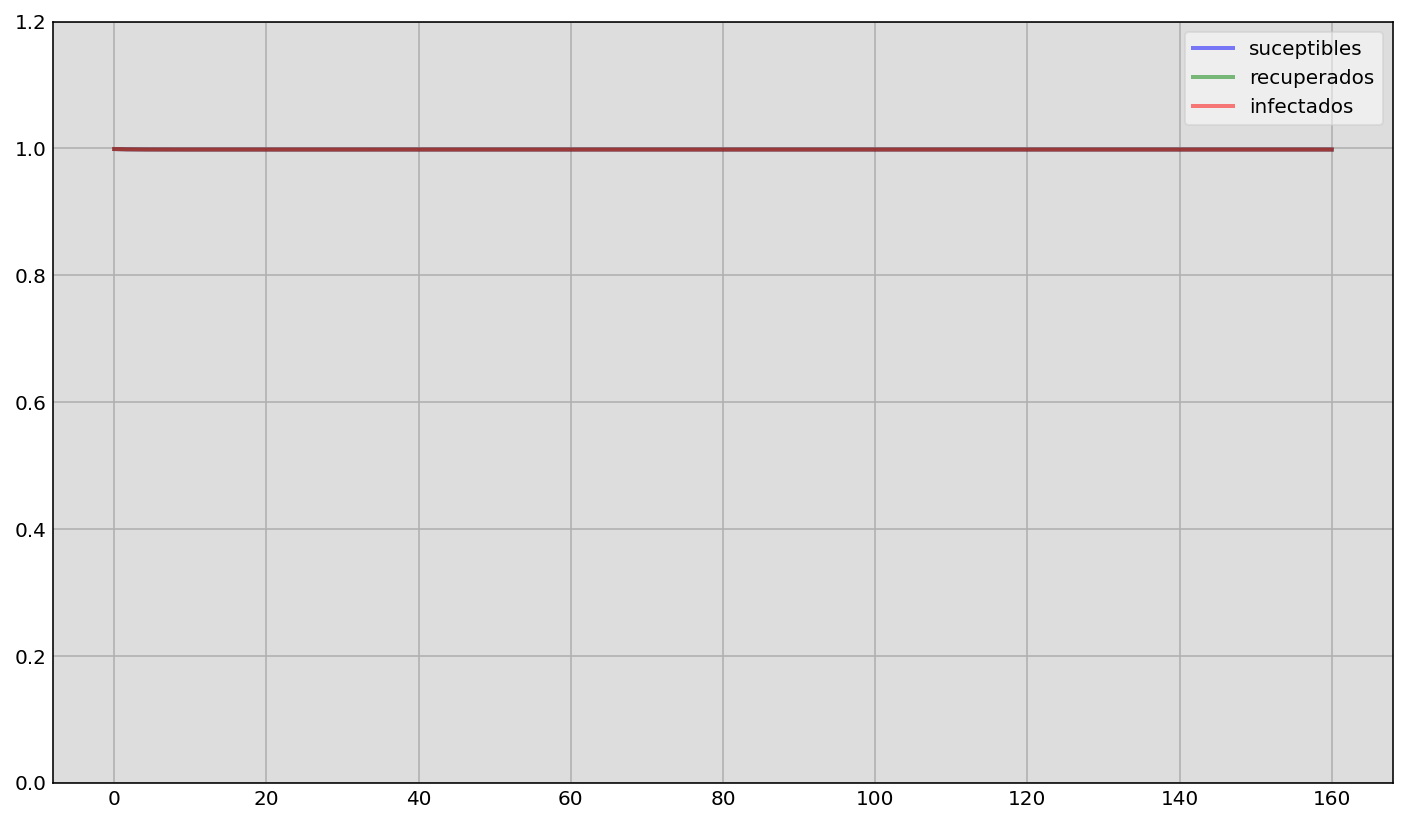

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
beta=0.4
gama=0.1
N=1000

I0,R0=1,0
s0=N-I0-R0
t=np.linspace(0,160,1000)

def f(y,t,N,beta,gama):
    s,I,R=y
    dsdt=-beta*s*I/N
    dIdt=-beta*s*I/N-gama*I
    dRdt=gama*I
    return dsdt,dIdt,dRdt
y0=s0,I0,R0
ret=odeint(f,y0,t,args=(N,beta,gama))
s,I,R=ret.T

fig= plt.figure(facecolor='w')
ax=fig.add_subplot(111,facecolor='#dddddd',axisbelow=True)
ax.plot(t,s/1000,'b',alpha=0.5,lw=2,label='suceptibles')
ax.plot(t,s/1000,'g',alpha=0.5,lw=2,label='recuperados')
ax.plot(t,s/1000,'r',alpha=0.5,lw=2,label='infectados')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend=ax.legend()
legend.get_frame().set_alpha(0.5)


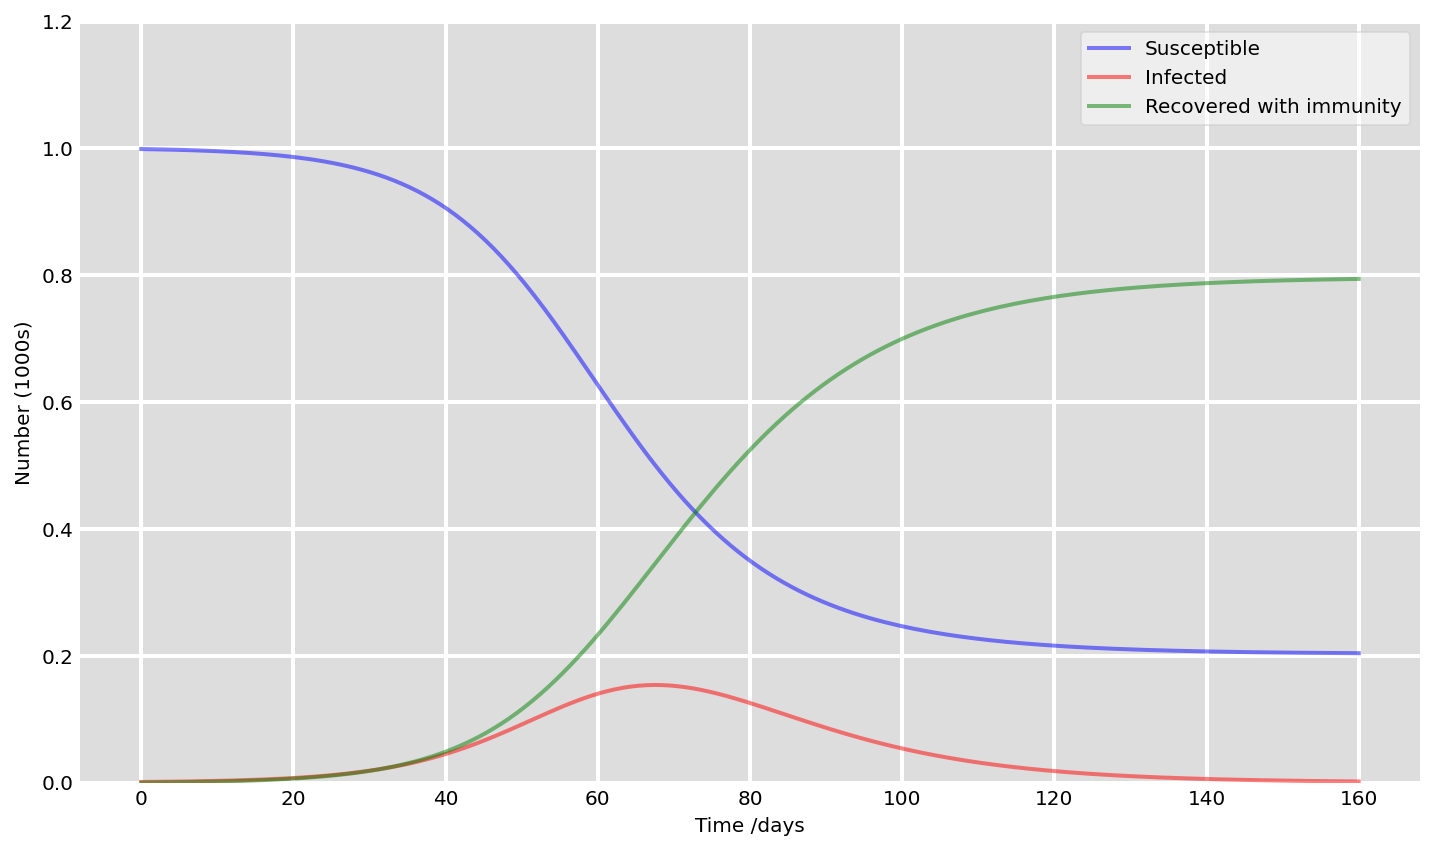

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

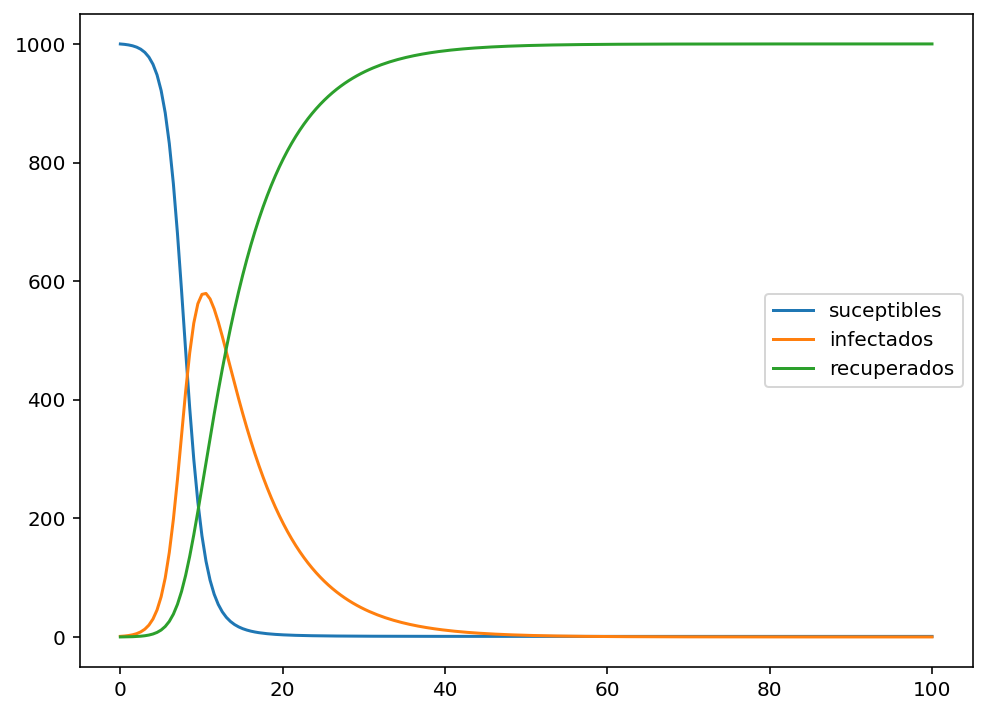

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
beta=0.001
gamma=1/7
def SIRmodel(SI0,t):
    S,I,R=SI0
    return [-beta*S*I,beta*S*I-gamma*I,gamma*I]
SI0=[1000,1,0]
t=np.linspace(0,100,200)
sol=integrate.odeint(SIRmodel,SI0,t)
fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(t,sol[:,0],label='suceptibles')
ax.plot(t,sol[:,1],label='infectados')
ax.plot(t,sol[:,2],label='recuperados')
plt.legend()